In [1]:
%reload_ext autoreload
%autoreload 2

from pathlib import Path
from mgclass import analysis, MusicGenreDataset, networks
from mgclass.utils import *
from mgclass.training import TrainingRun

In [2]:
dry_run = False
epochs = 10
repeat_count = 100

Using genre from playlist source
Dups for 0-6:   1
Dups for 0-7:   1
Dups for 1-4:  10
Dups for 2-7:   3
Dups for 5-7:   1
Clamping dataset to 160 songs per class. Removing 279 songs.
Preprocessing complete


Creating dataset:   0%|          | 0/1280 [00:00<?, ?it/s]

Dataset creation finished in: 112.4650 seconds


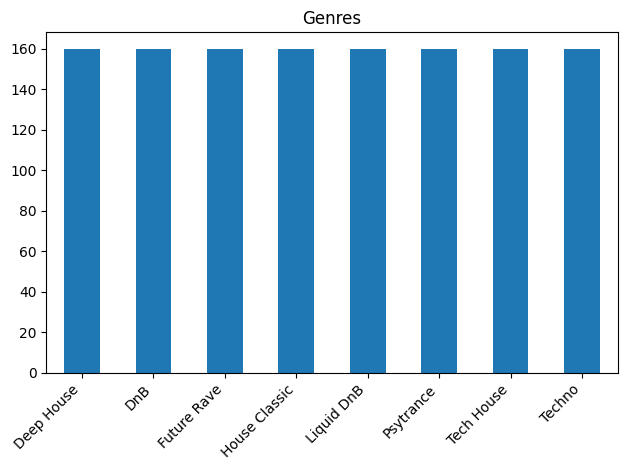

In [3]:
dataset = MusicGenreDataset(
        data_dir=Path("/home/georg/Music/ADL/"),
        preprocess=create_spectrogram(n_mels=128, win_length=1024),
        file_transform=mp3_to_wav_location,
        playlist_to_genre=sample_playlist_to_genre,
        transform=create_crop((128, 128)),
        dry_run = dry_run,
        #max_frames=16000*60*2
)

analysis.summarize_dataset(dataset)

Starting training for 10 epoch


  0%|          | 0.00/10.0 [00:00<?, ?epochs/s]

Epoch   1/10, train_loss: 1.881, train_acc: 0.395, val_loss: 1.795, val_acc: 0.473, in 68.85s
Epoch   2/10, train_loss: 1.698, train_acc: 0.579, val_loss: 1.725, val_acc: 0.547, in 64.28s
Epoch   3/10, train_loss: 1.627, train_acc: 0.648, val_loss: 1.694, val_acc: 0.575, in 63.67s
Epoch   4/10, train_loss: 1.590, train_acc: 0.684, val_loss: 1.730, val_acc: 0.537, in 63.03s
Epoch   5/10, train_loss: 1.565, train_acc: 0.709, val_loss: 1.706, val_acc: 0.564, in 63.30s
Epoch   6/10, train_loss: 1.547, train_acc: 0.726, val_loss: 1.775, val_acc: 0.493, in 64.81s
Epoch   7/10, train_loss: 1.531, train_acc: 0.743, val_loss: 1.745, val_acc: 0.522, in 68.35s
Epoch   8/10, train_loss: 1.520, train_acc: 0.754, val_loss: 1.736, val_acc: 0.531, in 68.40s
Epoch   9/10, train_loss: 1.506, train_acc: 0.768, val_loss: 1.682, val_acc: 0.586, in 67.99s
Epoch  10/10, train_loss: 1.496, train_acc: 0.777, val_loss: 1.788, val_acc: 0.483, in 68.94s
Training finished in: 661.6412 seconds
test_loss: 1.760, tes

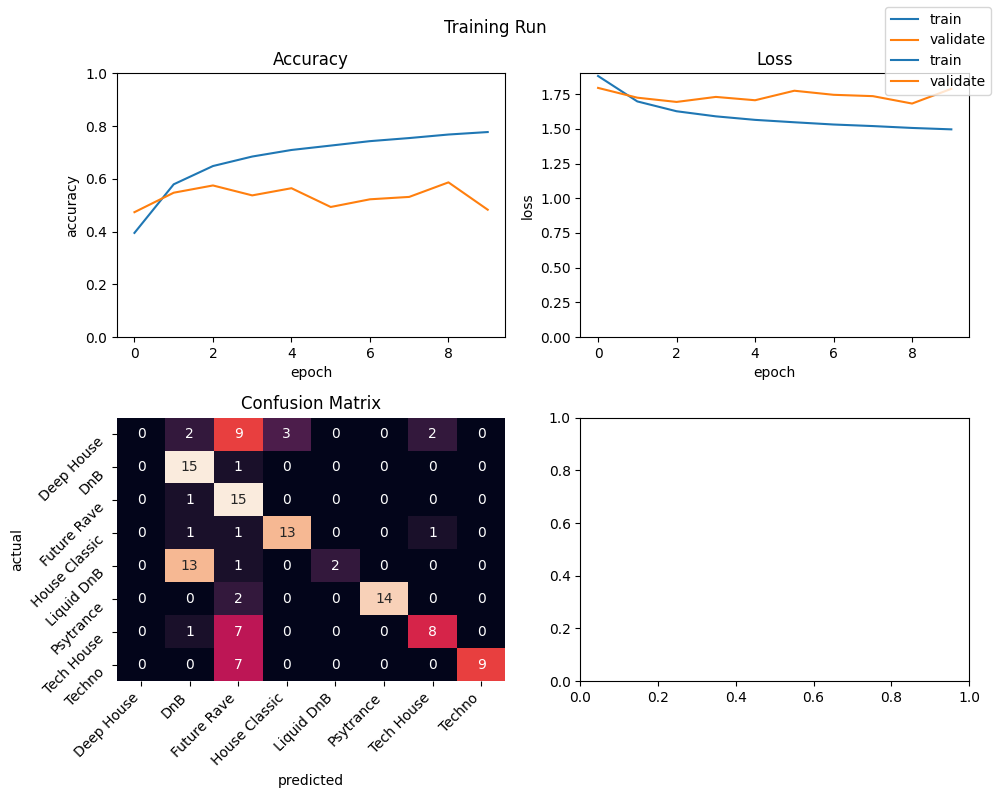

In [4]:
model = networks.ResNet(dataset.num_classes)
run = TrainingRun(dataset, model, batch_size=64, epochs=epochs, dry_run=dry_run, repeat_count=repeat_count)
run.start()
run.test()
run.plot()